In [9]:
import cv2
import matplotlib.pyplot as plt
img_path = r"C:\Users\pshun\Documents\python\tkinter_killingtime\niwatori.jpg"
img = cv2.imread(img_path, -1) #import the image
print(img.shape) #check the image size

(180, 267, 3)


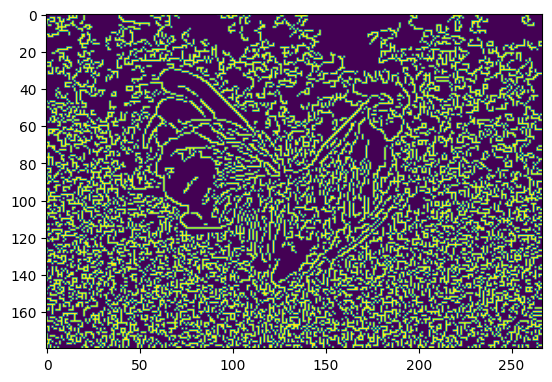

In [11]:
import cv2

# 定数定義
ORG_WINDOW_NAME = "org"
GRAY_WINDOW_NAME = "pen2_gray"
CANNY_WINDOW_NAME = "pen2_canny"

ORG_FILE_NAME = "re_pen2.jpg"
GRAY_FILE_NAME = "pen2_gray.png"
CANNY_FILE_NAME = "pen2_canny.png"

# グレースケールに変換
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# エッジ抽出
canny_img = cv2.Canny(gray_img, 50, 110)

plt.imshow(canny_img)


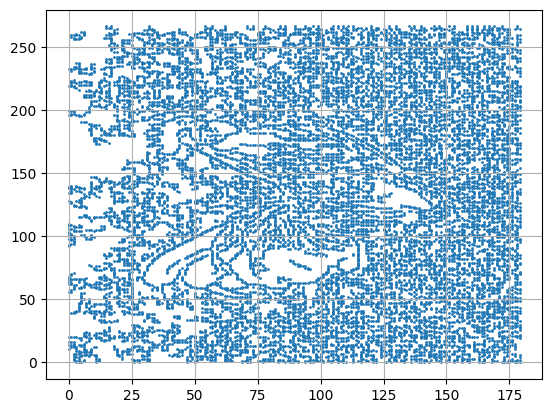

In [12]:

from matplotlib import pyplot as plt
import numpy as np


x = np.where(canny_img!=0)[0] 
y = np.where(canny_img!=0)[1]
plt.scatter(x,y,s=1)
plt.grid()
plt.show()

[ 5734 13775  2768 ... 12172   235 13349]


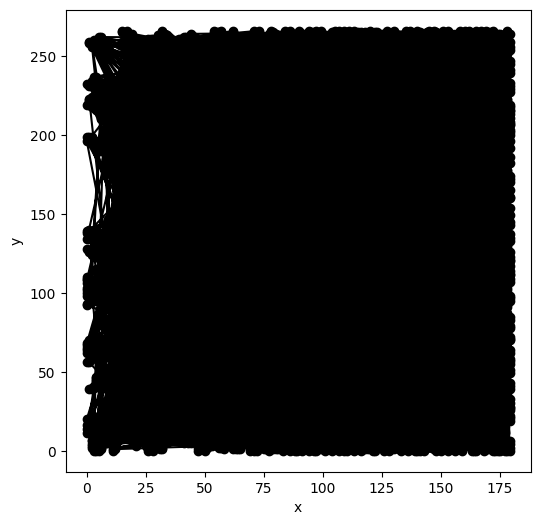

In [13]:
import numpy.random as nr 

nr.seed(1) 
num = x.shape[0]
#random 
para = np.arange(num)
nr.shuffle(para)
print(para)

#plot
plt.figure(figsize=(6, 6))
plt.plot(x[para], y[para], 'ok-')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [14]:
!pip install vcopt

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Running setup.py install for vcopt: started
  Running setup.py install for vcopt: finished with status 'done'


  DEPRECATION: vcopt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from vcopt import vcopt

def tsp_score(para):
   return np.sum(((x[para][:-1] - x[para][1:])**2 + (y[para][:-1] - y[para][1:])**2)**0.5)

#paraの可視化
def tsp_show_para(para, **info):
 #2-opt処理中の諸情報はinfoという辞書に格納されて渡されます
 #これらを受け取って使用することができます
   step_num = info['step_num']
   score = info['score']
   if (step_num%100)==0:
       #プロット（および保存）
       plt.figure()
       plt.plot(x[para], y[para], 'ok-')
       plt.xlabel('x'); plt.ylabel('y')
       plt.title('step={}, score={}'.format(step_num, score))
       plt.show()

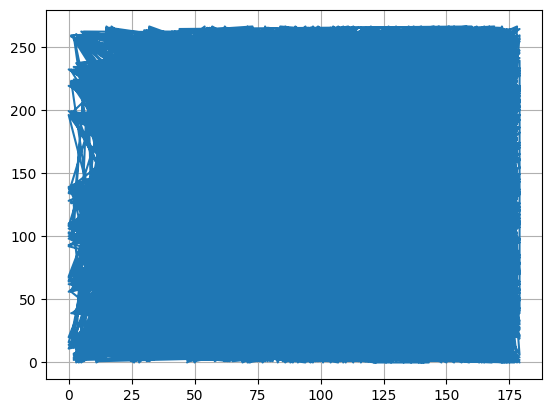

In [18]:
xpos = x[para]
ypos = y[para]
plt.plot(xpos, ypos)
plt.grid()
plt.show()

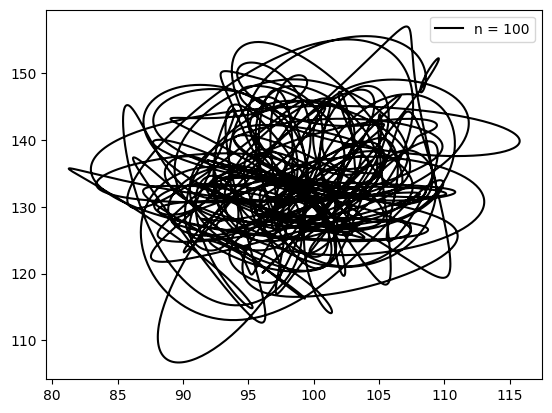

In [20]:
X = np.fft.fft(xpos)
Y = np.fft.fft(ypos)

nlim = 100 #The parameter

N = X.shape[0]
s = np.arange(0,N,1.0)
x_data = X[0] * np.cos(2*np.pi*0.0/N*s)/N
y_data = Y[0] * np.cos(2*np.pi*0.0/N*s)/N
for n in range(1,nlim+1):
   xan = (X[n] - X[N-n]) * (0.0 + 1.0j)
   xbn = (X[n] + X[N-n])
   yan = (Y[n] - Y[N-n]) * (0.0 + 1.0j)
   ybn = (Y[n] + Y[N-n])
   x_data = x_data + xan * np.sin(2*np.pi*n/N*s)/N + xbn * np.cos(2*np.pi*n/N*s)/N
   y_data = y_data + yan * np.sin(2*np.pi*n/N*s)/N + ybn * np.cos(2*np.pi*n/N*s)/N

plt.plot(np.real(x_data), np.real(y_data),label='n = '+str(nlim),color ='black')
plt.legend()
plt.show()